In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
path= '/content/drive/MyDrive/seeds.data'
features = ['Area',
            'Perimeter',
            'Compactness',
            'Length of kernel',
            'Width of kernel',
            'Asymmetry coefficient',
            ' groove.']
df = pd.read_csv(path,header=None,names=features + ['target'])
display(df)

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,groove.,target
0,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove,Class
1,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
3,14.29,14.09,0.905,5.291,3.337,2.699,4.825,1
4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
...,...,...,...,...,...,...,...,...
206,12.19,13.2,0.8783,5.137,2.981,3.631,4.87,3
207,11.23,12.88,0.8511,5.14,2.795,4.325,5.003,3
208,13.2,13.66,0.8883,5.236,3.232,8.315,5.056,3
209,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [3]:
from sklearn.model_selection import train_test_split
X, y = df.iloc[1:,[0,1,2,3,4,5,6]].values, df.iloc[1:, 7].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=0)
# standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
display(X)
X_test_std = sc.transform(X_test)

array([['15.26', '14.84', '0.871', ..., '3.312', '2.221', '5.22'],
       ['14.88', '14.57', '0.8811', ..., '3.333', '1.018', '4.956'],
       ['14.29', '14.09', '0.905', ..., '3.337', '2.699', '4.825'],
       ...,
       ['13.2', '13.66', '0.8883', ..., '3.232', '8.315', '5.056'],
       ['11.84', '13.21', '0.8521', ..., '2.836', '3.598', '5.044'],
       ['12.3', '13.34', '0.8684', ..., '2.974', '5.637', '5.063']],
      dtype=object)

In [4]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.98127661e+00 1.29867983e+00 6.71183896e-01 7.16986274e-02
 1.90146349e-02 8.36794608e-04 5.25481284e-03]


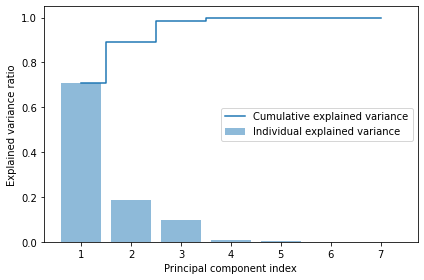

In [5]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,8), var_exp, alpha=0.5, align='center',label='Individual explained variance')
plt.step(range(1,8), cum_var_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='center right' )
plt.tight_layout()
plt.show()

In [6]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
display(eigen_pairs)

[(4.981276612378387,
  array([ 0.44840678,  0.44566817,  0.26603311,  0.4270008 ,  0.4345841 ,
         -0.06316244,  0.39288053])),
 (1.2986798276886788,
  array([ 0.00842522,  0.06764964, -0.54988255,  0.1944445 , -0.14160649,
          0.71759726,  0.34666241])),
 (0.6711838956654538,
  array([-0.01687518,  0.07061727, -0.61111966,  0.22629281, -0.2101738 ,
         -0.68810967,  0.22887729])),
 (0.07169862736463187,
  array([ 0.20014653,  0.29544465, -0.35052423,  0.22101663,  0.22469172,
          0.07363428, -0.80313751])),
 (0.01901463493334383,
  array([ 0.18011143,  0.14075166, -0.32879272, -0.76636062,  0.47486884,
         -0.04240561,  0.15823064])),
 (0.005254812841334548,
  array([-0.44905672, -0.4683458 , -0.1298912 ,  0.29934383,  0.68569395,
         -0.01769031,  0.04508532])),
 (0.0008367946076231445,
  array([-0.72417187,  0.68218052,  0.07446285, -0.05375436,  0.02735429,
          0.00604729,  0.0313969 ]))]

In [7]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.44840678  0.00842522]
 [ 0.44566817  0.06764964]
 [ 0.26603311 -0.54988255]
 [ 0.4270008   0.1944445 ]
 [ 0.4345841  -0.14160649]
 [-0.06316244  0.71759726]
 [ 0.39288053  0.34666241]]


In [8]:
X_train_pca = X_train_std.dot(w)

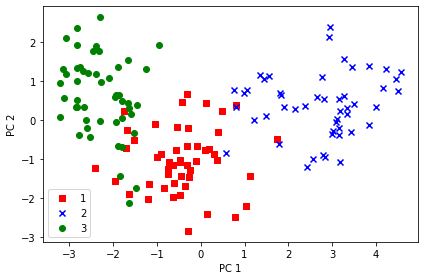

In [9]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_pca[y_train==l, 0],X_train_pca[y_train==l, 1],c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [10]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
 #setup marker generator and color map
 markers = ('s', 'x', 'o', '^', 'v')
 colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
 cmap = ListedColormap(colors[:len(np.unique(y))])
 # plot the decision surface
 x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
 x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
 np.arange(x2_min, x2_max, resolution))
 Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
 Z = Z.reshape(xx1.shape)
 plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
 plt.xlim(xx1.min(), xx1.max())
 plt.ylim(xx2.min(), xx2.max())
 # plot examples by class
 for idx, cl in enumerate(np.unique(y)):
   plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.6,color=cmap(idx),edgecolor='black',marker=markers[idx],label=cl)

<ipython-input-10-9013800c0c45>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.6,color=cmap(idx),edgecolor='black',marker=markers[idx],label=cl)


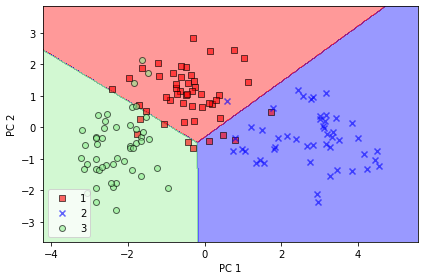

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
# initializing the PCA transformer and
# logistic regression estimator:
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr',random_state=1,solver='lbfgs')
# dimensionality reduction:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
# fitting the logistic regression model on the reduced dataset:
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

<ipython-input-10-9013800c0c45>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.6,color=cmap(idx),edgecolor='black',marker=markers[idx],label=cl)


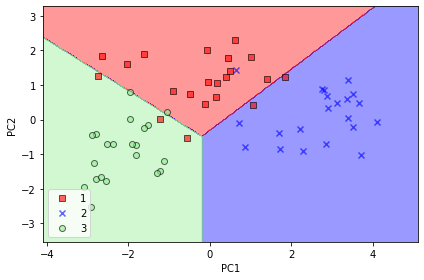

In [12]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [14]:
#Recommendation: 
#The first principal component (PC1) alone accounts for approximately 70 percent of the variance.
#The secpnd principal component (PC2) alone accounts for approximately 20 percent of the variance.
#PC3,PC4,PC5 accounts for rest of 10 percent of the variance.
# As PC1 & PC2 combinedly account for almost 90 percent of the variance, the wheatseed dataset can be transformed to 2 features (lower dimension)subspace.
# Thus, we have created a 7 × 2-dimensional projection matrix, W, from the top two eigenvectors.